In [14]:
from ultralytics import YOLO
model = YOLO("yolo12n.pt")

In [21]:
map_class_names = model.names
print(map_class_names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [16]:
path_onnx = model.export(format="onnx", imgsz=(640,640), opset=12, dynamic=True, half=False)
print("ONNX en:", path_onnx)

Ultralytics 8.3.182 🚀 Python-3.12.3 torch-2.8.0+cu128 CPU (AMD Ryzen 7 7735HS with Radeon Graphics)
YOLOv12n summary (fused): 159 layers, 2,590,824 parameters, 0 gradients, 6.5 GFLOPs

PyTorch: starting from 'yolo12n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.3 MB)

ONNX: starting export with onnx 1.17.0 opset 12...
ONNX: slimming with onnxslim 0.1.64...
ONNX: export success ✅ 6.0s, saved as 'yolo12n.onnx' (10.3 MB)

Export complete (6.5s)
Results saved to /home/paulinairene-ferrufino/Documentos/Paulino
Predict:         yolo predict task=detect model=yolo12n.onnx imgsz=640  
Validate:        yolo val task=detect model=yolo12n.onnx imgsz=640 data=None  
Visualize:       https://netron.app
ONNX en: yolo12n.onnx


In [5]:
#!yolo predict model=best.onnx source=prueba.jpg imgsz=640 conf=0.25

In [ ]:
from yolo_onnx_infer import YOLOONNXPredictor

pred = YOLOONNXPredictor("yolo12n.onnx", providers=["CPUExecutionProvider"], imgsz=640, class_names=map_class_names)
results = pred.predict("dog.jpg", conf_thres=0.25, iou_thres=0.50)

In [18]:
results

[{'x': 0.49593228101730347,
  'y': 0.4812043607234955,
  'w': 0.7161227464675903,
  'h': 0.8424385190010071,
  'conf': 0.931357741355896,
  'cls': 16,
  'label': 'dog'}]

Output in: dog_out.jpg


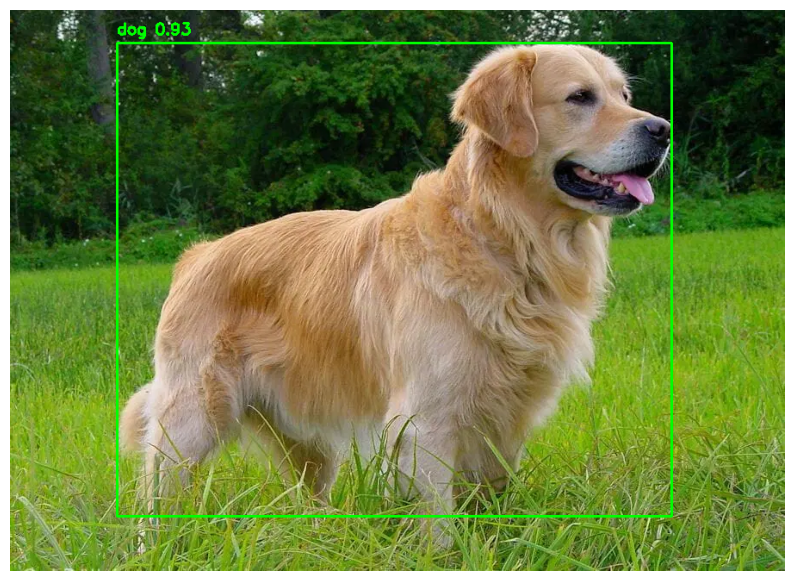

In [22]:
import cv2
import matplotlib.pyplot as plt

def draw_results(image_path, results, class_names=None, output_path="output.jpg"):
    img = cv2.imread(image_path)
    h, w = img.shape[:2]

    for det in results:
        x_center = det["x"] * w
        y_center = det["y"] * h
        bw = det["w"] * w
        bh = det["h"] * h

        x1 = int(x_center - bw / 2)
        y1 = int(y_center - bh / 2)
        x2 = int(x_center + bw / 2)
        y2 = int(y_center + bh / 2)

        conf = det["conf"]
        cls_id = det["cls"]
        label = class_names.get(cls_id, str(cls_id)) if class_names else str(cls_id)

        cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(img, f"{label} {conf:.2f}", (x1, max(y1-10, 0)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

    cv2.imwrite(output_path, img)
    print("Output in:", output_path)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()
    
    return img


img = draw_results("dog.jpg", results, map_class_names, output_path="dog_out.jpg")